# Craigslist Used Cars

## Import Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
import string
from collections import Counter
import itertools
import os
import pyrsm as rsm
import scipy.sparse as sp
import matplotlib as mpl

## Increase the picture's resolution
mpl.rcParams["figure.dpi"] = 150

In [2]:
zf = zipfile.ZipFile('Craigslist-Used-Cars.zip')
data = pd.read_csv(zf.open('vehicles.csv'))

In [3]:
data.head()

,Unnamed: 0,id,url,region,region_url,price,year,manufacturer,model,condition,...,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,0,7240372487,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,35990,2010.0,chevrolet,corvette grand sport,good,...,rwd,NaN,other,NaN,https://images.craigslist.org/00N0N_ipkbHVZYf4...,Carvana is the safer way to buy a car During t...,al,32.590000,-85.480000,2020-12-02T08:11:30-0600
1,1,7240309422,https://auburn.craigslist.org/cto/d/auburn-201...,auburn,https://auburn.craigslist.org,7500,2014.0,hyundai,sonata,excellent,...,fwd,NaN,sedan,NaN,https://images.craigslist.org/00s0s_gBHYmJ5o7y...,I'll move to another city and try to sell my c...,al,32.547500,-85.468200,2020-12-02T02:11:50-0600
2,2,7240224296,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,4900,2006.0,bmw,x3 3.0i,good,...,NaN,NaN,SUV,blue,https://images.craigslist.org/00B0B_5zgEGWPOrt...,Clean 2006 BMW X3 3.0I. Beautiful and rare Bl...,al,32.616807,-85.464149,2020-12-01T19:50:41-0600
3,3,7240103965,https://auburn.craigslist.org/cto/d/lanett-tru...,auburn,https://auburn.craigslist.org,2000,1974.0,chevrolet,c-10,good,...,rwd,full-size,pickup,blue,https://images.craigslist.org/00M0M_6o7KcDpArw...,1974 chev. truck (LONG BED) NEW starter front ...,al,32.861600,-85.216100,2020-12-01T15:54:45-0600
4,4,7239983776,https://auburn.craigslist.org/cto/d/auburn-200...,auburn,https://auburn.craigslist.org,19500,2005.0,ford,f350 lariat,excellent,...,4wd,full-size,pickup,blue,https://images.craigslist.org/00p0p_b95l1EgUfl...,2005 Ford F350 Lariat (Bullet Proofed). This t...,al,32.547500,-85.468200,2020-12-01T12:53:56-0600


## EDA and Cleaning

#### Detecting and removing outliers 

In [ ]:
np.quantile(data.price, 0.999)

119800.0

In [ ]:
np.quantile(data.odometer, 0.99)

nan

In [ ]:
data = data[['id', 'region', 'price', 'year',
       'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer',
       'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'description', 'state', 'lat', 'long']]
data = data[data.price > 999]
data = data[data.price <=85000]
data = data[data.odometer <= 290098.7499999992]

In [ ]:
data = data.dropna(axis=0)

In [ ]:
data.shape

(81021, 20)

#### Re-define price column

In [ ]:
## Create a column used to collect price range information
data['price_range'] = 0

## Use 5000 as a baseline level to distribute each price range
data['price_range'] = rsm.ifelse(data.price >= 5000, 'above_5000', 'below_5000')

data['price_range'] = rsm.ifelse(
    (data.price > 5000) & (data.price <= 10000), 
    'above_5000 & below_10000', 
    data['price_range']
)

data['price_range'] = rsm.ifelse(
    (data.price > 10000) & (data.price <= 15000), 
    'above_10000 & below_15000', 
    data['price_range']
)

data['price_range'] = rsm.ifelse(
    (data.price > 15000) & (data.price <= 20000), 
    'above_15000 & below_20000', 
    data['price_range']
)

data['price_range'] = rsm.ifelse(
    (data.price > 20000) & (data.price <= 25000), 
    'above_20000 & below_25000', 
    data['price_range']
)

data['price_range'] = rsm.ifelse(
    (data.price >25000) & (data.price <= 30000), 
    'above_25000 & below_30000', 
    data['price_range']
)

data['price_range'] = rsm.ifelse(
    (data.price >30000) & (data.price <= 35000), 
    'above_30000 & below_35000', 
    data['price_range']
)

data['price_range'] = rsm.ifelse(
    (data.price >35000) & (data.price <= 40000), 
    'above_35000 & below_40000', 
    data['price_range']
)

data['price_range'] = rsm.ifelse(
    (data.price >40000) & (data.price <= 45000), 
    'above_40000 & below_45000', 
    data['price_range']
)

data['price_range'] = rsm.ifelse(
    (data.price >45000) & (data.price <= 50000), 
    'above_45000 & below_50000', 
    data['price_range']
)

data['price_range'] = rsm.ifelse(
    (data.price >50000) & (data.price <= 55000), 
    'above_50000 & below_55000', 
    data['price_range']
)

data['price_range'] = rsm.ifelse(
    (data.price >55000) & (data.price <= 60000), 
    'above_55000 & below_60000', 
    data['price_range']
)

data['price_range'] = rsm.ifelse(
    (data.price >60000) & (data.price <= 65000), 
    'above_60000 & below_65000', 
    data['price_range']
)

data['price_range'] = rsm.ifelse(
    (data.price >65000) & (data.price <= 70000), 
    'above_65000 & below_70000', 
    data['price_range']
)

data['price_range'] = rsm.ifelse(
    (data.price >70000), 
    'above_70000 ', 
    data['price_range']
)

### Used car price analysis

#### year

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


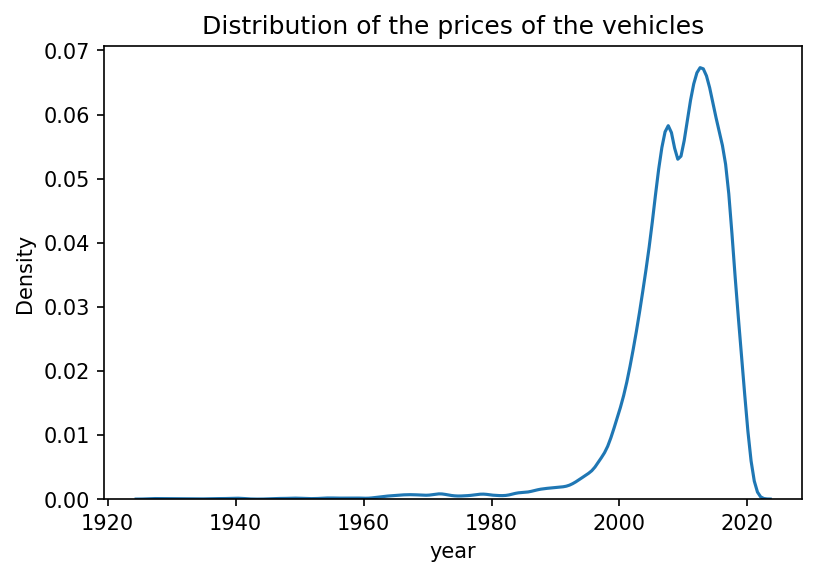

In [ ]:
sns.distplot(data.year, hist = False)
plt.title("Distribution of the prices of the vehicles")
plt.show()

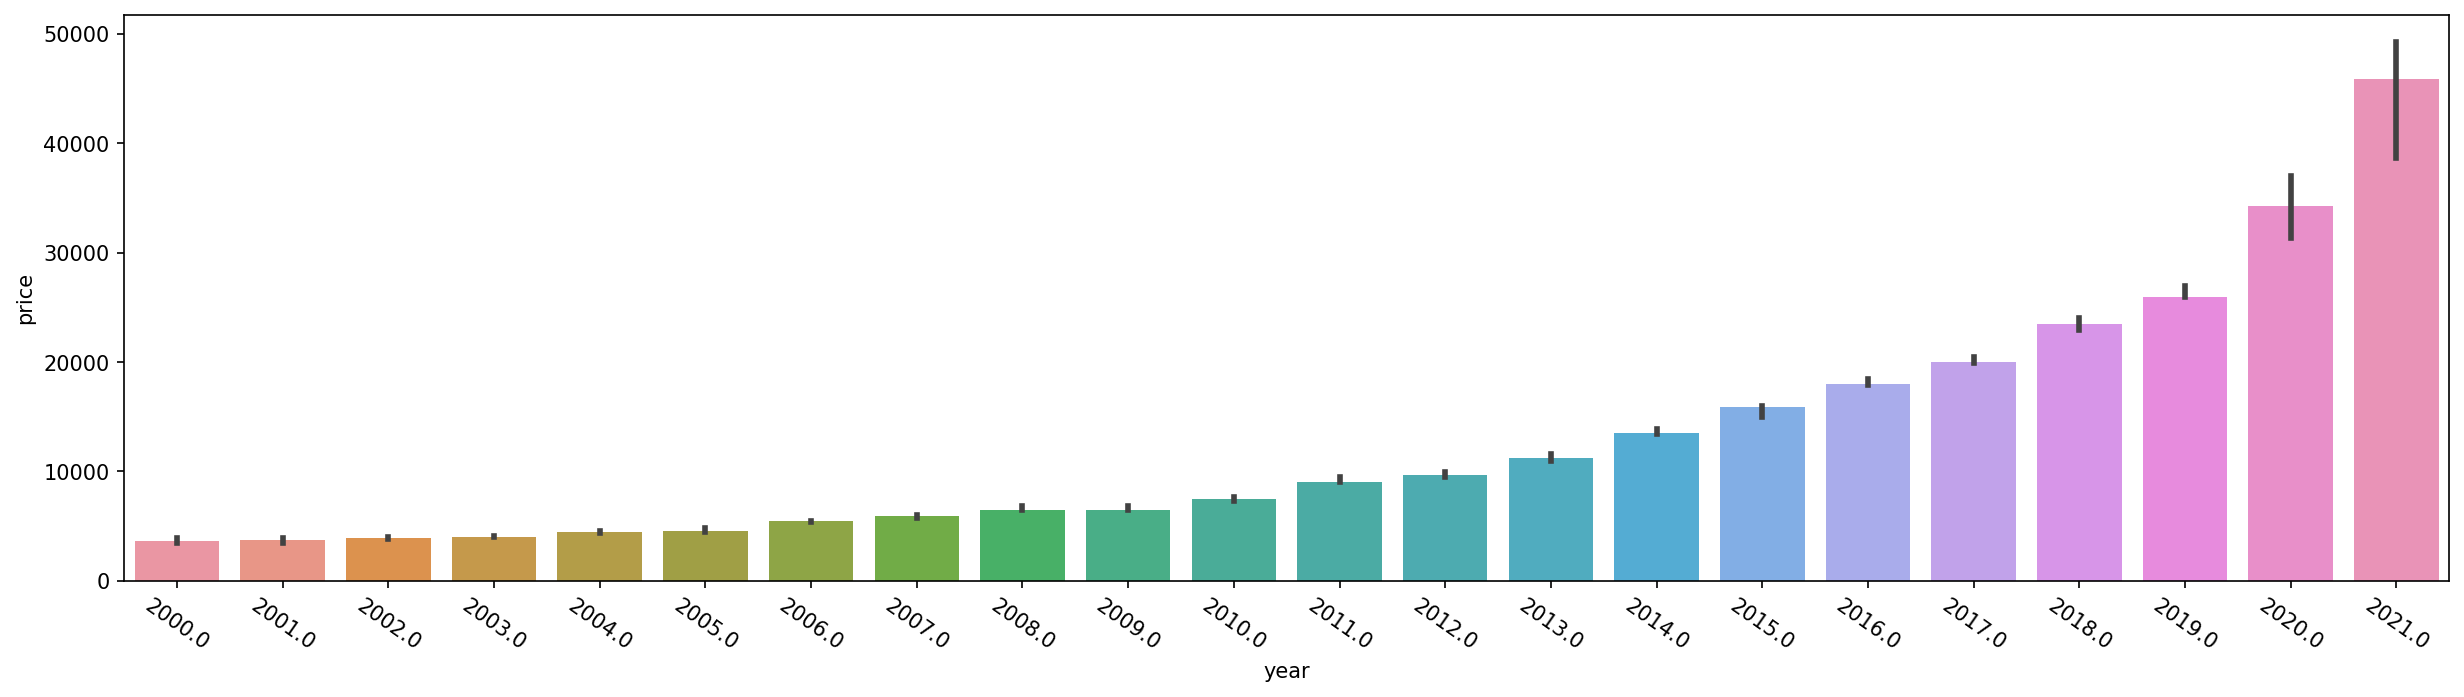

In [ ]:
from numpy import mean,median
plt.figure(figsize=(20,5))
plt.xticks(rotation= -35)
sns.barplot(data= data[data.year >= 2000],x="year", y= "price", estimator=median)
plt.show()

#### odometer

<AxesSubplot:xlabel='odometer', ylabel='price'>

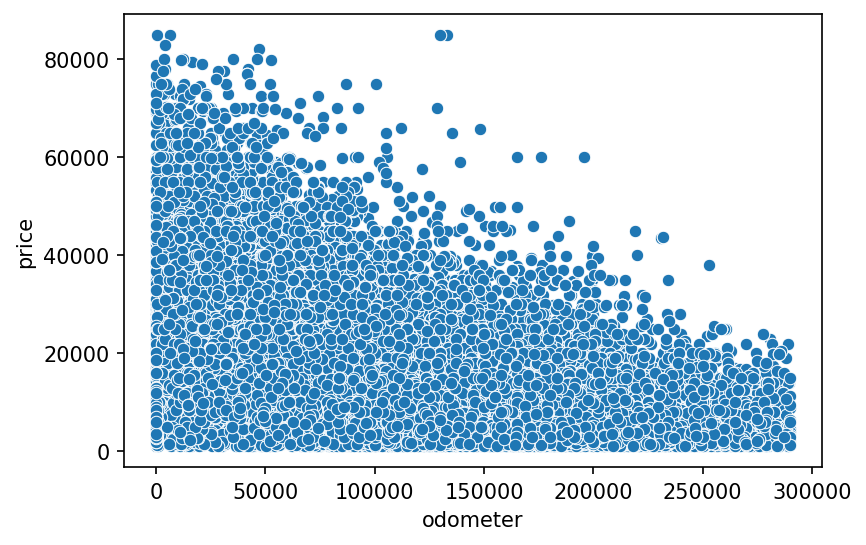

In [ ]:
sns.scatterplot(data=data, x="odometer", y="price")

#### manufacturer

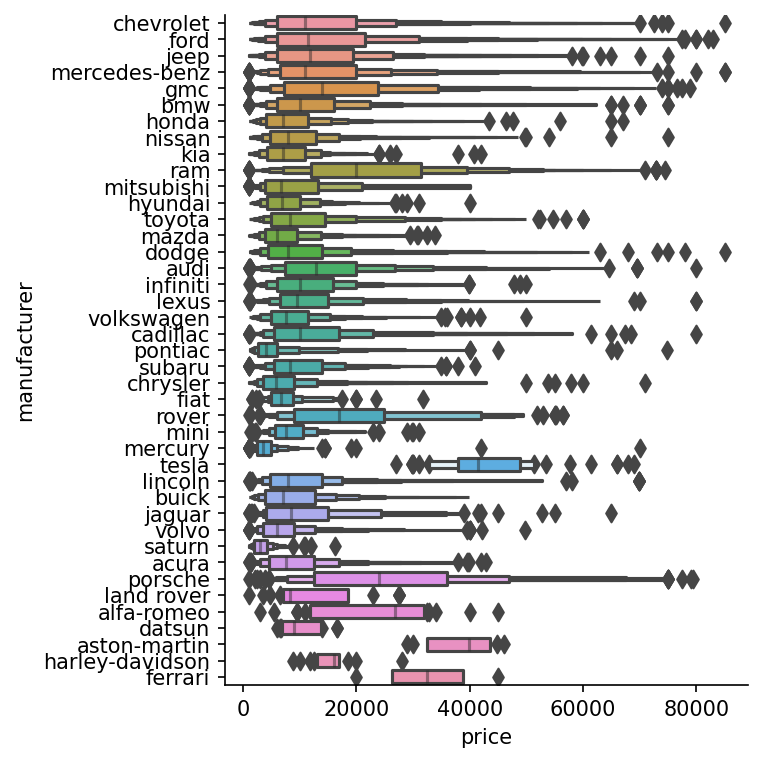

In [ ]:
sns.catplot(y="manufacturer", x="price",kind="boxen", data=data)

#### Drive type

<AxesSubplot:xlabel='drive', ylabel='price'>

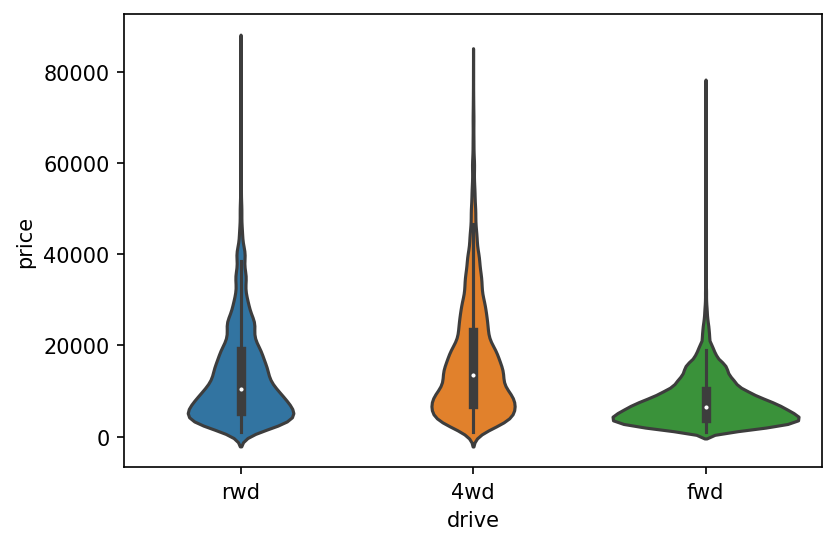

In [ ]:
sns.violinplot(x="drive", y="price",data=data)

#### Fuel type

<AxesSubplot:xlabel='fuel', ylabel='price'>

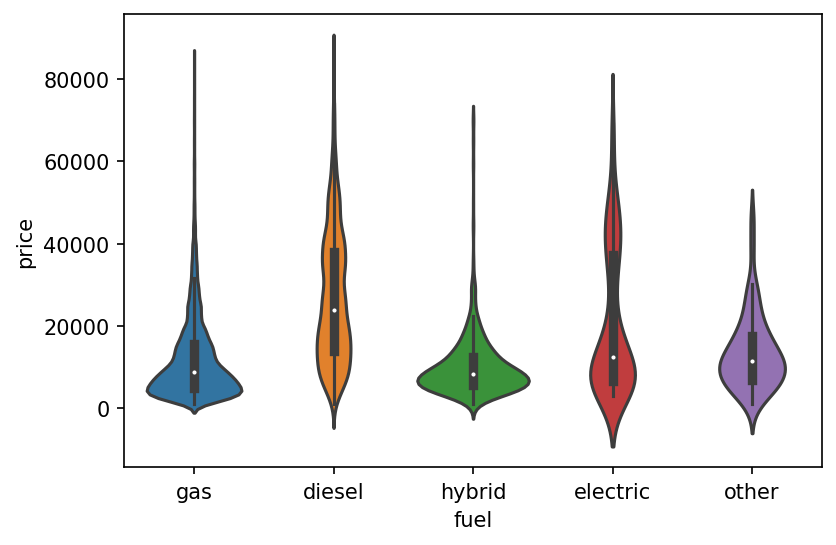

In [ ]:
sns.violinplot(x=data.fuel, y=data.price)

#### Type

<AxesSubplot:xlabel='price', ylabel='type'>

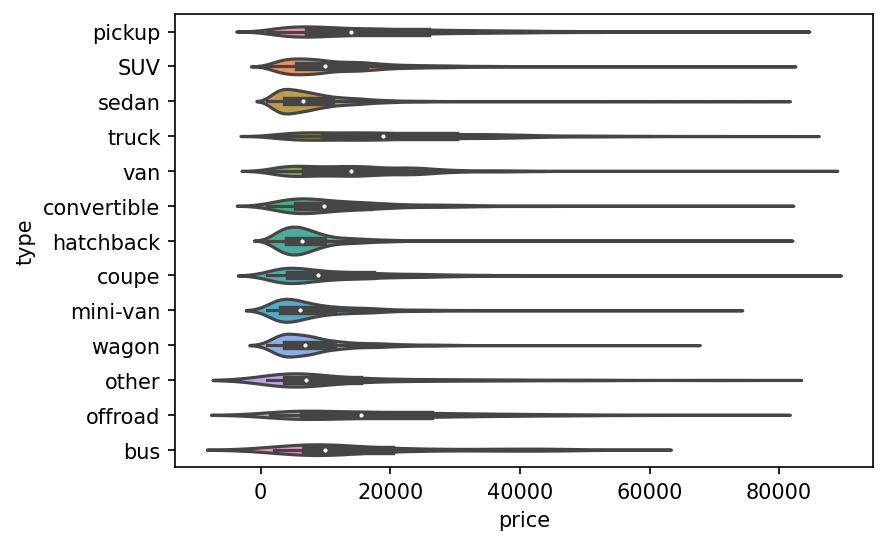

In [ ]:
sns.violinplot(y="type", x="price",data=data)

#### paint color 

<AxesSubplot:xlabel='price', ylabel='paint_color'>

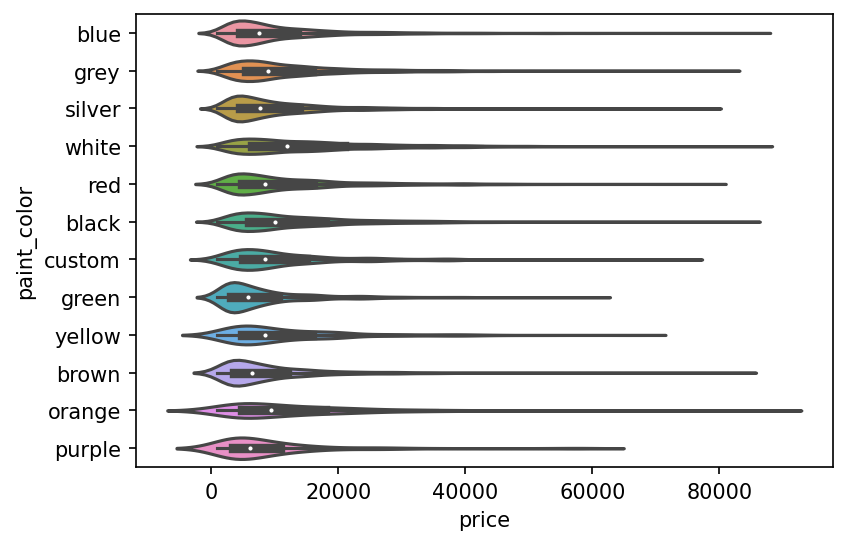

In [ ]:
sns.violinplot(y="paint_color", x="price", data=data)

#### title_status

<AxesSubplot:xlabel='price', ylabel='title_status'>

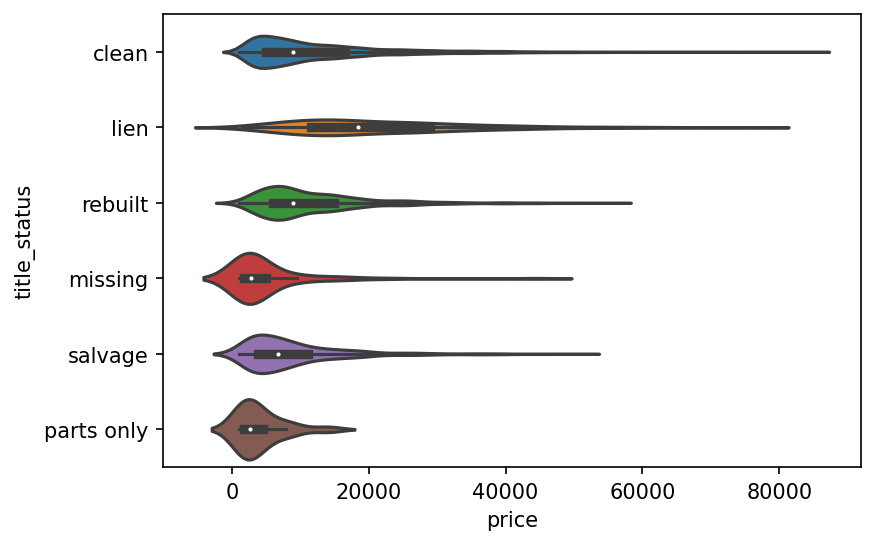

In [ ]:
sns.violinplot(y="title_status", x="price", data=data)

## Preprocessing

#### Slice data frame

In [ ]:
X = data.drop(['price','price_range'],axis = 1)
y = data['price_range']

#### Function Used for TF-IDF Model

In [ ]:
ps = PorterStemmer() 
stop = set(stopwords.words('english'))

# define function that can tokenize and stem each headline
def pre_processing_by_nltk(doc, stemming = True):
    translator = str.maketrans(string.punctuation, ' ' * len(string.punctuation))
    sent_nopuncts = doc.translate(translator)
    # step 1: get sentences
    sentences = sent_tokenize(sent_nopuncts)
    # step 2: get tokens
    tokens = []
    for sent in sentences:
        words = word_tokenize(sent)
        # step 3 (optional): stemming
        if stemming:
            words = [ps.stem(word) for word in words]
        tokens += words
    return [w.lower() for w in tokens if w not in stop]

#### Function Used for Word2Vec Model

## Model Building and Tuning

### Baseline Model (Word2Vec) (Description only)

#### Create token

In [ ]:
# Use tokens to train our Word2Vec Model
token_w2v = X['description'].apply(pre_pro_by_nltk)
w2v_model = Word2Vec(token_w2v,
                     min_count=3,
                        window=5,
                         size=100,
                         alpha=0.1, 
                         min_alpha=0.1, 
                         negative=20)

#### Create Vector

In [ ]:
X_w2v = []
for doc in token_w2v:
    if np.isnan(doc2vec(doc, w2v_model)).any():
        alt = np.random.uniform(-0.25, 0.25, w2v_model.vector_size)
        X_w2v.append(alt)
    else:
        X_w2v.append(doc2vec(doc, w2v_model))

<ipython-input-45-89860c3a8cb0>:26: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  vecs.append(wv[token])
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


#### Split data set to train, vali and test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_w2v, y, random_state=42, test_size=0.3, shuffle = True)
X_vali, X_test, y_vali, y_test = train_test_split(X_test, y_test, random_state=42, test_size=0.5, shuffle = True)

In [ ]:
clf_w2c = LogisticRegression(max_iter=100000000, random_state = 0).fit(X_train, y_train)

In [ ]:
clf_w2c.score(X_vali, y_vali)

0.40195836418991193

In [ ]:
clf_w2c.score(X_test, y_test)

0.40422906039164064

In [ ]:
f1_score(y_test, clf_w2c.predict(X_test), average = 'micro')

0.40422906039164064

### Baseline Model (TF-IDF) (Description Only)

In [ ]:
# create tf-idf vectors for dataset
tfidf = TfidfVectorizer(strip_accents=None,
                        lowercase=True,
                        preprocessor=None,  # applied preprocessor in Data Cleaning
                        tokenizer=pre_processing_by_nltk,
                        use_idf=True,
                        norm='l2',
                        smooth_idf=True)

In [ ]:
X_tfidf = tfidf.fit_transform(X['description'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, random_state=42, test_size=0.3, shuffle=True)
X_vali, X_test, y_vali, y_test = train_test_split(X_test, y_test, random_state=42, test_size=0.5, shuffle=True)

In [ ]:
clf_base = LogisticRegression(random_state=0, max_iter = 10000).fit(X_train, y_train)

In [ ]:
clf_base.score(X_vali, y_vali) 

0.6061054883567843

In [ ]:
clf_base.score(X_test, y_test) 

0.6090998848115846

In [ ]:
f1_score(y_test, clf_base.predict(X_test), average = 'micro')

0.6090998848115846

### Model 2 (Description + Car Model + Manufacturer + Car Year)

In [ ]:
X_desc = X_tfidf
X_model = tfidf.fit_transform(X['model'])
X_manu = tfidf.fit_transform(X['manufacturer'])
X_year = tfidf.fit_transform(X['year'].astype(str))

In [ ]:
X2 = sp.hstack((X_tfidf,X_model,X_manu,X_year))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=42, test_size=0.3, shuffle=True)
X_vali, X_test, y_vali, y_test = train_test_split(X_test, y_test, random_state=42, test_size=0.5, shuffle=True)

In [ ]:
clf_2 = LogisticRegression(random_state=0, max_iter = 10000).fit(X_train, y_train)

In [ ]:
clf_2.score(X_vali, y_vali) 

0.6790092981156916

In [ ]:
clf_2.score(X_test, y_test) 

0.6824090834293237

In [ ]:
f1_score(y_test, clf_2.predict(X_test), average = 'micro')

0.6824090834293237

### Model 3 (Description + Car Model + Manufacturer + Car Year + Cylinder + Fuel + Transmission + Drive + Size + Type)

In [ ]:
X_cyl = tfidf.fit_transform(X['cylinders'])
X_fuel = tfidf.fit_transform(X['fuel'])
X_trans = tfidf.fit_transform(X['transmission'])
X_drive = tfidf.fit_transform(X['drive'])
X_size = tfidf.fit_transform(X['size'])
X_type = tfidf.fit_transform(X['type'])

In [ ]:
X3 = sp.hstack((X_tfidf,X_model,X_manu,X_year,X_cyl,X_fuel,X_trans,X_drive,X_size,X_type))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X3, y, random_state=42, test_size=0.3, shuffle=True)
X_vali, X_test, y_vali, y_test = train_test_split(X_test, y_test, random_state=42, test_size=0.5, shuffle=True)

In [ ]:
clf_3 = LogisticRegression(random_state=0, max_iter = 10000).fit(X_train, y_train)

In [ ]:
clf_3.score(X_vali, y_vali) 

0.685674319098165

In [ ]:
clf_3.score(X_test, y_test) 

0.6911304920190884

In [ ]:
f1_score(y_test, clf_3.predict(X_test), average = 'micro')

0.6911304920190884

### Model 4 (All Variables)

In [ ]:
X_state = tfidf.fit_transform(X['state'])
X_title = tfidf.fit_transform(X['title_status'])
X_odo = tfidf.fit_transform(X['odometer'].astype(str))

In [ ]:
X4 = sp.hstack((X_tfidf,X_model,X_manu,X_year,X_cyl,X_fuel,X_trans,X_drive,X_size,X_type,X_state,X_title,X_odo))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X4, y, random_state=42, test_size=0.3, shuffle=True)
X_vali, X_test, y_vali, y_test = train_test_split(X_test, y_test, random_state=42, test_size=0.5, shuffle=True)

In [ ]:
clf_4 = LogisticRegression(random_state=0, max_iter = 10000).fit(X_train, y_train)

In [ ]:
clf_4.score(X_vali, y_vali) 

0.7221262239776187

In [ ]:
clf_4.score(X_test, y_test) 

0.7240414678295212

In [ ]:
f1_score(y_test, clf_4.predict(X_test), average = 'micro')

0.7240414678295212

### Model 5 (All Variables - Description)

In [ ]:
X5 = sp.hstack((X_model,X_manu,X_year,X_cyl,X_fuel,X_trans,X_drive,X_size,X_type,X_state,X_title,X_odo))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X5, y, random_state=42, test_size=0.3, shuffle=True)
X_vali, X_test, y_vali, y_test = train_test_split(X_test, y_test, random_state=42, test_size=0.5, shuffle=True)

In [ ]:
clf_5 = LogisticRegression(random_state=0, max_iter = 10000).fit(X_train, y_train)

In [ ]:
clf_5.score(X_vali, y_vali) 

0.6627993088126388

In [ ]:
clf_5.score(X_test, y_test) 

0.6652130985683725

In [ ]:
f1_score(y_test, clf_5.predict(X_test), average = 'micro')

0.6652130985683725